In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Bidirectional
from keras.layers import Flatten,BatchNormalization
from keras.layers import Dropout,Conv1D,MaxPooling1D,LSTM
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,label_binarize
import tensorflow as tf
import tensorflow_addons as tfa
import warnings
warnings.filterwarnings('ignore')

C:\Users\jatin\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\jatin\anaconda3\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure yo

In [2]:
tf.__version__

'2.15.0'

In [3]:
!python --version

Python 3.11.5


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### importing the data

In [5]:
df=pd.read_csv("E:\\Naresh IT class\\AIML project\\mental-state.csv")
df.head(15)

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_3  lag1_mean_d_h2h1_0  \
0     25.781648    33.836367   -92.769629    19.187957           -1.542262   
1     29.357891    26.792566   417.203910    19.472121          -38.797263   
2     28.451926    31.076434    72.231301    14.245938          -13.225057   
3     21.282184    19.985184    16.220094    39.787312            1.847866   
4     20.431516    28.982168    27.540246    19.960398            2.491458   
5     24.816488    33.935570  -139.661789    18.848441            7.250759   
6      3.290689    59.500039   -19.426774   -22.421016           49.851473   
7     26.824973    33.298484    34.236922     5.649555            1.322003   
8     44.601480    38.371996   -62.398910    20.694754          -26.686357   
9     32.201758    30.958168   100.820516    18.152215           21.937420   
10    23.101816    30.477508    26.327129    19.544609            5.413476   
11    21.932617    26.210758    23.971531    17.717324           -2.867010   
12    28.642652    33.388141   132.465363    20.271336           12.282841   
13    26.878332    29.747035   -54.609309    19.948898           12.350982   
14    20.587906    25.955211    40.008543   -13.595590           -4.499990   

    lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_d_h2h1_3  \
0             0.197462         -119.561133            2.032654   
1           -16.897194          -29.368531           -9.055370   
2            -0.614138          -28.331698           -8.858742   
3             0.670216           -1.820355           20.220724   
4            -6.020503           -1.071166            2.655259   
5            -0.724992          -49.476718           -6.629389   
6            -4.575969         -204.340127           62.050689   
7            -1.967359            4.834666            1.535953   
8           -20.452949           24.818914          -32.064117   
9             1.223513           52.014698            2.404429   
10           -2.634352           -5.786214            6.890611   
11            0.195260           17.018003            0.688683   
12            4.533475          149.301799            0.360675   
13           -1.976629          233.827732           -7.577908   
14           -7.513197           12.640854           -3.594026   

    lag1_mean_q1_0  lag1_mean_q1_1  lag1_mean_q1_2  lag1_mean_q1_3  \
0        21.596272       33.965587      -44.185210       20.566772   
1        44.647424       40.893307      383.877655       26.973276   
2        31.450289       30.692883      112.487661       23.340511   
3        21.404679       20.777411       18.611532       29.742982   
4        16.295039       32.658163       26.448437       16.809317   
5        23.006642       36.701695     -146.012507       19.307340   
6        -4.015810       34.750684      165.102354      -32.521349   
7        25.196159       32.972679       28.352427        5.168234   
8        50.084090       43.571026      -79.886988       28.235439   
9        31.222693       30.983085       80.075546       17.366235   
10       16.189292       32.362863       45.483564       15.194014   
11       13.701422       20.267702       22.310798        5.883853   
12       20.015918       29.800635      106.335924       19.168101   
13       40.204557       31.412684     -208.805423       21.154054   
14       20.700649       27.767548       16.969351       -9.724846   

    lag1_mean_q2_0  lag1_mean_q2_1  lag1_mean_q2_2  lag1_mean_q2_3  \
0        31.378853       33.515684      -22.087550       15.839519   
1        52.757486       29.737761      478.635262       21.104585   
2        38.583510       32.055949       60.993231       14.132874   
3        19.339359       18.552407       15.687991       29.612657   
4        22.000462       31.344195       29.660396       20.408235   
5        19.423353       31.957691      -84.652487       24.943779   
6       -38.790622       88.113854        2.551568      -73.820713   
7        27.10631

### Understanding the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Columns: 989 entries, lag1_mean_0 to Label
dtypes: float64(989)
memory usage: 18.7 MB


In [7]:
df.columns

Index(['lag1_mean_0', 'lag1_mean_1', 'lag1_mean_2', 'lag1_mean_3',
       'lag1_mean_d_h2h1_0', 'lag1_mean_d_h2h1_1', 'lag1_mean_d_h2h1_2',
       'lag1_mean_d_h2h1_3', 'lag1_mean_q1_0', 'lag1_mean_q1_1',
       ...
       'freq_669_3', 'freq_679_3', 'freq_689_3', 'freq_699_3', 'freq_709_3',
       'freq_720_3', 'freq_730_3', 'freq_740_3', 'freq_750_3', 'Label'],
      dtype='object', length=989)

In [8]:
df.isnull().sum()

lag1_mean_0           0
lag1_mean_1           0
lag1_mean_2           0
lag1_mean_3           0
lag1_mean_d_h2h1_0    0
lag1_mean_d_h2h1_1    0
lag1_mean_d_h2h1_2    0
lag1_mean_d_h2h1_3    0
lag1_mean_q1_0        0
lag1_mean_q1_1        0
lag1_mean_q1_2        0
lag1_mean_q1_3        0
lag1_mean_q2_0        0
lag1_mean_q2_1        0
lag1_mean_q2_2        0
lag1_mean_q2_3        0
lag1_mean_d_q1q2_0    0
lag1_mean_d_q1q2_1    0
lag1_mean_d_q1q2_2    0
lag1_mean_d_q1q2_3    0
lag1_mean_d_q1q3_0    0
lag1_mean_d_q1q3_1    0
lag1_mean_d_q1q3_2    0
lag1_mean_d_q1q3_3    0
lag1_mean_d_q1q4_0    0
lag1_mean_d_q1q4_1    0
lag1_mean_d_q1q4_2    0
lag1_mean_d_q1q4_3    0
lag1_mean_d_q2q3_0    0
lag1_mean_d_q2q3_1    0
lag1_mean_d_q2q3_2    0
lag1_mean_d_q2q3_3    0
lag1_mean_d_q2q4_0    0
lag1_mean_d_q2q4_1    0
lag1_mean_d_q2q4_2    0
lag1_mean_d_q2q4_3    0
lag1_std_0            0
lag1_std_1            0
lag1_std_2            0
lag1_std_3            0
lag1_std_d_h2h1_0     0
lag1_std_d_h2h1_

In [9]:
continues=df.drop('Label', axis=1)

In [10]:
continues.describe()

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_3  lag1_mean_d_h2h1_0  \
count  2479.000000  2479.000000  2479.000000  2479.000000         2479.000000   
mean     23.584351    27.060411    20.452931    11.526044            0.014449   
std      10.543938    24.252348    72.104439    19.196870           13.382998   
min     -35.224945  -369.150109  -579.490660  -251.495367          -75.143730   
25%      18.732076    21.328936    17.124174     6.541236           -4.647636   
50%      23.553828    27.574535    25.217098    15.144375           -0.140909   
75%      27.759551    32.247539    30.746496    20.589852            3.965898   
max      92.313766   408.180215   591.014113    69.694520          104.963158   

       lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_d_h2h1_3  \
count         2479.000000         2479.000000         2479.000000   
mean             0.003397            0.554037            0.103880   
std             39.383221           97.200697           14.461716   
min           -728.743981        -1048.773622          -96.231800   
25%             -3.342428           -6.773096           -4.498267   
50%              0.180963            0.144378           -0.180041   
75%              3.594742            7.305102            4.146319   
max            512.648208          896.171353          172.660240   

       lag1_mean_q1_0  lag1_mean_q1_1  lag1_mean_q1_2  lag1_mean_q1_3  \
count     2479.000000     2479.000000     2479.000000     2479.000000   
mean        23.271148       26.809551       19.550566       11.094231   
std         17.639164       36.255490       99.410219       22.931254   
min       -351.810178     -800.320690     -931.466781     -250.924186   
25%         17.020349       20.684966       13.413359        5.059414   
50%         23.761987       27.442672       24.566321       14.318299   
75%         29.574478       32.720855       31.712921       21.715288   
max        116.412065      539.925670      751.162851      104.055380   

       lag1_mean_q2_0  lag1_mean_q2_1  lag1_mean_q2_2  lag1_mean_q2_3  \
count     2479.000000     2479.000000     2479.000000     2479.000000   
mean        23.875053       27.301317       20.784803       11.843980   
std         16.544067       37.120344       98.084869       23.020806   
min       -118.767524     -596.347247     -948.216199     -326.314051   
25%         16.780871       20.643741       14.216220        4.870531   
50%         23.462482       27.043790       24.688527       14.545841   
75%         29.568640       32.783551       32.912615       21.935743   
max        209.682082      649.394878      826.657045      118.329299   

       lag1_mean_d_q1q2_0  lag1_mean_d_q1q2_1  lag1_mean_d_q1q2_2  \
count         2479.000000         2479.000000         2479.000000   
mean            -0.603905           -0.491766           -1.234237   
std             23.316994           38.593014           93.974004   
min           -561.492260         -610.601999        -1107.293014   
25%             -4.571657           -3.999909           -9.140541   
50%              0.417265            0.030524           -0.611763   
75%              5.809354            3.854454            6.955669   
max            122.804838          922.215727          827.643845   

       lag1_mean_d_q1q2_3  lag1_mean_d_q1q3_0  lag1_mean_d_q1q3_1  \
count         2479.000000         2479.000000         2479.000000   
mean            -0.749749           -0.009102            0.015853   
std             20.656524           22.393472           47.947189   
min           -267.819754         -365.591464         -735.311965   
25%             -4.963258           -5.937000           -4.684902   
50%              0.207647            0.015439           -0.298916   
75%              5.464460            5.959343            4.438087   
max             99.596780          361.071274         1131.697070   

       lag1_mean_d_q1q3_2  lag1_mean_d_q1q3_3  lag1_mean_d_q1q4_0  \
count         2479.000000 

In [11]:
df['Label'].value_counts()

Label
2.0    830
1.0    830
0.0    819
Name: count, dtype: int64

### Encoding

In [12]:
df_new= pd.get_dummies(df, columns = ['Label'])

In [13]:
df_new.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q1_3,lag1_mean_q2_0,lag1_mean_q2_1,lag1_mean_q2_2,lag1_mean_q2_3,lag1_mean_d_q1q2_0,lag1_mean_d_q1q2_1,lag1_mean_d_q1q2_2,lag1_mean_d_q1q2_3,lag1_mean_d_q1q3_0,lag1_mean_d_q1q3_1,lag1_mean_d_q1q3_2,lag1_mean_d_q1q3_3,lag1_mean_d_q1q4_0,lag1_mean_d_q1q4_1,lag1_mean_d_q1q4_2,lag1_mean_d_q1q4_3,lag1_mean_d_q2q3_0,lag1_mean_d_q2q3_1,lag1_mean_d_q2q3_2,lag1_mean_d_q2q3_3,lag1_mean_d_q2q4_0,lag1_mean_d_q2q4_1,lag1_mean_d_q2q4_2,lag1_mean_d_q2q4_3,lag1_std_0,lag1_std_1,lag1_std_2,lag1_std_3,lag1_std_d_h2h1_0,lag1_std_d_h2h1_1,lag1_std_d_h2h1_2,lag1_std_d_h2h1_3,lag1_skew_0,lag1_skew_1,lag1_skew_2,lag1_skew_3,lag1_kurt_0,lag1_kurt_1,lag1_kurt_2,lag1_kurt_3,lag1_max_0,lag1_max_1,lag1_max_2,lag1_max_3,lag1_max_d_h2h1_0,lag1_max_d_h2h1_1,lag1_max_d_h2h1_2,lag1_max_d_h2h1_3,lag1_max_q1_0,lag1_max_q1_1,lag1_max_q1_2,lag1_max_q1_3,lag1_max_q2_0,lag1_max_q2_1,lag1_max_q2_2,lag1_max_q2_3,lag1_max_d_q1q2_0,lag1_max_d_q1q2_1,lag1_max_d_q1q2_2,lag1_max_d_q1q2_3,lag1_max_d_q1q3_0,lag1_max_d_q1q3_1,lag1_max_d_q1q3_2,lag1_max_d_q1q3_3,lag1_max_d_q1q4_0,lag1_max_d_q1q4_1,lag1_max_d_q1q4_2,lag1_max_d_q1q4_3,lag1_max_d_q2q3_0,lag1_max_d_q2q3_1,lag1_max_d_q2q3_2,lag1_max_d_q2q3_3,lag1_max_d_q2q4_0,lag1_max_d_q2q4_1,lag1_max_d_q2q4_2,lag1_max_d_q2q4_3,lag1_min_0,lag1_min_1,lag1_min_2,lag1_min_3,lag1_min_d_h2h1_0,lag1_min_d_h2h1_1,lag1_min_d_h2h1_2,lag1_min_d_h2h1_3,lag1_min_q1_0,lag1_min_q1_1,lag1_min_q1_2,lag1_min_q1_3,lag1_min_q2_0,lag1_min_q2_1,lag1_min_q2_2,lag1_min_q2_3,lag1_min_d_q1q2_0,lag1_min_d_q1q2_1,lag1_min_d_q1q2_2,lag1_min_d_q1q2_3,lag1_min_d_q1q3_0,lag1_min_d_q1q3_1,lag1_min_d_q1q3_2,lag1_min_d_q1q3_3,lag1_min_d_q1q4_0,lag1_min_d_q1q4_1,lag1_min_d_q1q4_2,lag1_min_d_q1q4_3,lag1_min_d_q2q3_0,lag1_min_d_q2q3_1,lag1_min_d_q2q3_2,lag1_min_d_q2q3_3,lag1_min_d_q2q4_0,lag1_min_d_q2q4_1,lag1_min_d_q2q4_2,lag1_min_d_q2q4_3,lag1_covM_0_0,lag1_covM_0_1,lag1_covM_0_2,lag1_covM_0_3,lag1_covM_1_1,lag1_covM_1_2,lag1_covM_1_3,lag1_covM_2_2,lag1_covM_2_3,lag1_covM_3_3,lag1_eigenval_0,lag1_eigenval_1,lag1_eigenval_2,lag1_eigenval_3,lag1_logcovM_0_0,lag1_logcovM_0_1,lag1_logcovM_0_2,lag1_logcovM_0_3,lag1_logcovM_1_1,lag1_logcovM_1_2,lag1_logcovM_1_3,lag1_logcovM_2_2,lag1_logcovM_2_3,lag1_logcovM_3_3,lag1_topFreq_1_0,lag1_topFreq_2_0,lag1_topFreq_3_0,lag1_topFreq_4_0,lag1_topFreq_5_0,lag1_topFreq_6_0,lag1_topFreq_7_0,lag1_topFreq_8_0,lag1_topFreq_9_0,lag1_topFreq_10_0,lag1_topFreq_1_1,lag1_topFreq_2_1,lag1_topFreq_3_1,lag1_topFreq_4_1,lag1_topFreq_5_1,lag1_topFreq_6_1,lag1_topFreq_7_1,lag1_topFreq_8_1,lag1_topFreq_9_1,lag1_topFreq_10_1,lag1_topFreq_1_2,lag1_topFreq_2_2,lag1_topFreq_3_2,lag1_topFreq_4_2,lag1_topFreq_5_2,lag1_topFreq_6_2,lag1_topFreq_7_2,lag1_topFreq_8_2,lag1_topFreq_9_2,lag1_topFreq_10_2,lag1_topFreq_1_3,lag1_topFreq_2_3,lag1_topFreq_3_3,lag1_topFreq_4_3,lag1_topFreq_5_3,lag1_topFreq_6_3,lag1_topFreq_7_3,lag1_topFreq_8_3,lag1_topFreq_9_3,lag1_topFreq_10_3,lag1_freq_010_0,lag1_freq_020_0,lag1_freq_030_0,lag1_freq_041_0,lag1_freq_051_0,lag1_freq_061_0,lag1_freq_071_0,lag1_freq_081_0,lag1_freq_091_0,lag1_freq_101_0,lag1_freq_111_0,lag1_freq_122_0,lag1_freq_132_0,lag1_freq_142_0,lag1_freq_152_0,lag1_freq_162_0,lag1_freq_172_0,lag1_freq_182_0,lag1_freq_193_0,lag1_freq_203_0,lag1_freq_213_0,lag1_freq_223_0,lag1_freq_233_0,lag1_freq_243_0,lag1_freq_253_0,lag1_freq_264_0,lag1_freq_274_0,lag1_freq_284_0,lag1_freq_294_0,lag1_freq_304_0,lag1_freq_314_0,lag1_freq_324_0,lag1_freq_334_0,lag1_freq_345_0,lag1_freq_355_0,lag1_freq_365_0,lag1_freq_375_0,lag1_freq_385_0,lag1_freq_395_0,lag1_freq_405_0,lag1_freq_416_0,lag1_freq_426_0,lag1_freq_436_0,lag1_freq_446_0,lag1_freq_456_0,lag1_freq_466_0,lag1_freq_476_0,lag1_freq_486_0,lag1_freq_517_0,lag1_freq_527_0,lag1_freq_537_0,lag1_freq_547_0,lag1_freq_557_0,lag1_freq_568_0,lag1_freq_578_0,lag1_freq_588_0,lag1_freq_598_0,lag1_freq_608_0,l

In [14]:
X=df_new.loc[:,'lag1_mean_0':'freq_750_3']
X.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q1_3,lag1_mean_q2_0,lag1_mean_q2_1,lag1_mean_q2_2,lag1_mean_q2_3,lag1_mean_d_q1q2_0,lag1_mean_d_q1q2_1,lag1_mean_d_q1q2_2,lag1_mean_d_q1q2_3,lag1_mean_d_q1q3_0,lag1_mean_d_q1q3_1,lag1_mean_d_q1q3_2,lag1_mean_d_q1q3_3,lag1_mean_d_q1q4_0,lag1_mean_d_q1q4_1,lag1_mean_d_q1q4_2,lag1_mean_d_q1q4_3,lag1_mean_d_q2q3_0,lag1_mean_d_q2q3_1,lag1_mean_d_q2q3_2,lag1_mean_d_q2q3_3,lag1_mean_d_q2q4_0,lag1_mean_d_q2q4_1,lag1_mean_d_q2q4_2,lag1_mean_d_q2q4_3,lag1_std_0,lag1_std_1,lag1_std_2,lag1_std_3,lag1_std_d_h2h1_0,lag1_std_d_h2h1_1,lag1_std_d_h2h1_2,lag1_std_d_h2h1_3,lag1_skew_0,lag1_skew_1,lag1_skew_2,lag1_skew_3,lag1_kurt_0,lag1_kurt_1,lag1_kurt_2,lag1_kurt_3,lag1_max_0,lag1_max_1,lag1_max_2,lag1_max_3,lag1_max_d_h2h1_0,lag1_max_d_h2h1_1,lag1_max_d_h2h1_2,lag1_max_d_h2h1_3,lag1_max_q1_0,lag1_max_q1_1,lag1_max_q1_2,lag1_max_q1_3,lag1_max_q2_0,lag1_max_q2_1,lag1_max_q2_2,lag1_max_q2_3,lag1_max_d_q1q2_0,lag1_max_d_q1q2_1,lag1_max_d_q1q2_2,lag1_max_d_q1q2_3,lag1_max_d_q1q3_0,lag1_max_d_q1q3_1,lag1_max_d_q1q3_2,lag1_max_d_q1q3_3,lag1_max_d_q1q4_0,lag1_max_d_q1q4_1,lag1_max_d_q1q4_2,lag1_max_d_q1q4_3,lag1_max_d_q2q3_0,lag1_max_d_q2q3_1,lag1_max_d_q2q3_2,lag1_max_d_q2q3_3,lag1_max_d_q2q4_0,lag1_max_d_q2q4_1,lag1_max_d_q2q4_2,lag1_max_d_q2q4_3,lag1_min_0,lag1_min_1,lag1_min_2,lag1_min_3,lag1_min_d_h2h1_0,lag1_min_d_h2h1_1,lag1_min_d_h2h1_2,lag1_min_d_h2h1_3,lag1_min_q1_0,lag1_min_q1_1,lag1_min_q1_2,lag1_min_q1_3,lag1_min_q2_0,lag1_min_q2_1,lag1_min_q2_2,lag1_min_q2_3,lag1_min_d_q1q2_0,lag1_min_d_q1q2_1,lag1_min_d_q1q2_2,lag1_min_d_q1q2_3,lag1_min_d_q1q3_0,lag1_min_d_q1q3_1,lag1_min_d_q1q3_2,lag1_min_d_q1q3_3,lag1_min_d_q1q4_0,lag1_min_d_q1q4_1,lag1_min_d_q1q4_2,lag1_min_d_q1q4_3,lag1_min_d_q2q3_0,lag1_min_d_q2q3_1,lag1_min_d_q2q3_2,lag1_min_d_q2q3_3,lag1_min_d_q2q4_0,lag1_min_d_q2q4_1,lag1_min_d_q2q4_2,lag1_min_d_q2q4_3,lag1_covM_0_0,lag1_covM_0_1,lag1_covM_0_2,lag1_covM_0_3,lag1_covM_1_1,lag1_covM_1_2,lag1_covM_1_3,lag1_covM_2_2,lag1_covM_2_3,lag1_covM_3_3,lag1_eigenval_0,lag1_eigenval_1,lag1_eigenval_2,lag1_eigenval_3,lag1_logcovM_0_0,lag1_logcovM_0_1,lag1_logcovM_0_2,lag1_logcovM_0_3,lag1_logcovM_1_1,lag1_logcovM_1_2,lag1_logcovM_1_3,lag1_logcovM_2_2,lag1_logcovM_2_3,lag1_logcovM_3_3,lag1_topFreq_1_0,lag1_topFreq_2_0,lag1_topFreq_3_0,lag1_topFreq_4_0,lag1_topFreq_5_0,lag1_topFreq_6_0,lag1_topFreq_7_0,lag1_topFreq_8_0,lag1_topFreq_9_0,lag1_topFreq_10_0,lag1_topFreq_1_1,lag1_topFreq_2_1,lag1_topFreq_3_1,lag1_topFreq_4_1,lag1_topFreq_5_1,lag1_topFreq_6_1,lag1_topFreq_7_1,lag1_topFreq_8_1,lag1_topFreq_9_1,lag1_topFreq_10_1,lag1_topFreq_1_2,lag1_topFreq_2_2,lag1_topFreq_3_2,lag1_topFreq_4_2,lag1_topFreq_5_2,lag1_topFreq_6_2,lag1_topFreq_7_2,lag1_topFreq_8_2,lag1_topFreq_9_2,lag1_topFreq_10_2,lag1_topFreq_1_3,lag1_topFreq_2_3,lag1_topFreq_3_3,lag1_topFreq_4_3,lag1_topFreq_5_3,lag1_topFreq_6_3,lag1_topFreq_7_3,lag1_topFreq_8_3,lag1_topFreq_9_3,lag1_topFreq_10_3,lag1_freq_010_0,lag1_freq_020_0,lag1_freq_030_0,lag1_freq_041_0,lag1_freq_051_0,lag1_freq_061_0,lag1_freq_071_0,lag1_freq_081_0,lag1_freq_091_0,lag1_freq_101_0,lag1_freq_111_0,lag1_freq_122_0,lag1_freq_132_0,lag1_freq_142_0,lag1_freq_152_0,lag1_freq_162_0,lag1_freq_172_0,lag1_freq_182_0,lag1_freq_193_0,lag1_freq_203_0,lag1_freq_213_0,lag1_freq_223_0,lag1_freq_233_0,lag1_freq_243_0,lag1_freq_253_0,lag1_freq_264_0,lag1_freq_274_0,lag1_freq_284_0,lag1_freq_294_0,lag1_freq_304_0,lag1_freq_314_0,lag1_freq_324_0,lag1_freq_334_0,lag1_freq_345_0,lag1_freq_355_0,lag1_freq_365_0,lag1_freq_375_0,lag1_freq_385_0,lag1_freq_395_0,lag1_freq_405_0,lag1_freq_416_0,lag1_freq_426_0,lag1_freq_436_0,lag1_freq_446_0,lag1_freq_456_0,lag1_freq_466_0,lag1_freq_476_0,lag1_freq_486_0,lag1_freq_517_0,lag1_freq_527_0,lag1_freq_537_0,lag1_freq_547_0,lag1_freq_557_0,lag1_freq_568_0,lag1_freq_578_0,lag1_freq_588_0,lag1_freq_598_0,lag1_freq_608_0,l

In [15]:
y=df_new.loc[:,'Label_0.0':'Label_2.0']
y.head()

,Label_0.0,Label_1.0,Label_2.0
0,False,False,True
1,False,False,True
2,False,False,True
3,False,True,False
4,False,False,True


In [16]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

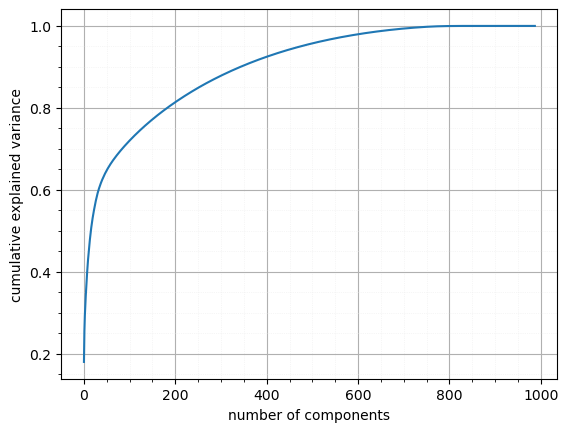

In [17]:
pca = PCA().fit(X_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.show()

In [18]:
pca = PCA(n_components = 500)
X_trans = pca.fit_transform(X_new)

In [19]:
X_fin = pd.DataFrame(data=X_trans)
X_fin.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,-21.044050,-0.010535,0.718237,-2.682393,4.193227,-1.814457,1.506927,-7.564069,5.086254,-2.217937,0.409228,4.062115,-1.923271,-0.537127,-2.022794,-4.680602,4.243459,-1.099899,-0.662029,-11.139245,-11.342665,1.479456,-1.391147,-5.273550,9.848428,7.158755,1.749149,-3.985621,5.782040,6.703016,4.856763,-0.491475,-1.094194,-6.827878,3.290850,1.640990,1.069902,0.469893,0.667523,-1.842763,-0.483406,-1.638295,-3.672994,-1.158406,-0.234171,-1.841091,0.247508,3.735552,-1.947234,1.196221,-0.638006,1.586631,-1.260331,-1.710065,0.532772,0.614323,0.794397,0.462126,0.546996,-1.956864,0.273937,0.154358,-0.576828,-0.776136,1.485271,-0.632688,0.058979,0.425239,-0.213049,-0.000418,0.858147,-0.416185,1.194380,1.961341,-0.427848,-0.001201,-0.413979,-0.263987,-1.272912,-0.679731,0.193204,0.073323,-0.646651,-0.197932,0.490999,1.628385,-0.269353,-0.023496,-0.711038,-0.053491,1.703021,1.412282,0.312813,0.340284,-1.019483,0.287326,-0.292780,-1.025566,0.210172,-0.295582,0.581929,-0.315959,-0.096605,-0.529857,-0.238256,-0.363235,-0.483795,0.588948,0.608807,0.274892,1.562650,0.278781,-1.030941,-0.398441,-0.297052,0.096800,0.591898,-0.061940,0.201659,0.479949,-0.157992,0.669774,0.238443,0.724871,0.529994,-0.224674,0.951399,0.559474,-0.187792,-0.242104,-0.256465,-0.116151,-0.363196,-0.420198,-0.198214,-0.377827,-0.390383,0.985027,0.667285,-0.431703,0.216201,0.898119,0.990828,-0.790874,-0.390671,-0.264475,0.359267,0.454662,1.080568,0.252199,0.676386,-0.014684,0.660665,-0.507749,0.440505,0.336284,0.892124,-0.822671,-0.372345,0.031090,-1.259394,-0.974063,0.001754,1.292273,-0.023872,0.090539,0.271537,-0.995241,-0.222947,0.266079,-0.133734,0.688967,-0.909534,-1.128152,-0.224409,-0.175670,0.304821,-0.104538,-0.353166,0.138834,0.233009,0.377669,0.280502,0.387896,-0.175374,0.318173,0.209076,0.370498,-0.023787,0.310202,-1.066190,0.660537,-0.374417,0.190517,-0.368482,0.039551,-0.180688,-0.254996,0.041964,0.629245,-0.110908,0.288607,-0.383427,-0.116640,0.204743,0.446788,0.565886,-0.550023,0.550469,-0.512401,0.740286,0.658270,-0.228006,0.510042,0.659657,-0.101965,-0.234382,-0.480152,0.359864,-0.048271,-0.403682,-1

In [20]:
X_fin=X_fin.values
y=y.values

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.25,random_state=42)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [23]:
X_train.shape

(1487, 500)

In [24]:
X_val.shape

(372, 500)

In [51]:
model = Sequential()
input_shape=(X_train.shape[1], 1)
model.add(Conv1D(64, kernel_size=5,activation='relu', input_shape=input_shape))
model.add(Conv1D(64,kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(32,kernel_size=3, activation='relu'))
model.add(Conv1D(32,kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D())
model.add(Conv1D(32,kernel_size=3, activation='relu'))
model.add(Conv1D(32,kernel_size=3, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 496, 64)           384       
                                                                 
 conv1d_13 (Conv1D)          (None, 492, 64)           20544     
                                                                 
 dropout_5 (Dropout)         (None, 492, 64)           0         
                                                                 
 batch_normalization_3 (Bat  (None, 492, 64)           256       
 chNormalization)                                                
                                                                 
 conv1d_14 (Conv1D)          (None, 490, 32)           6176      
                                                                 
 conv1d_15 (Conv1D)          (None, 488, 32)           3104      
                                                      

In [52]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'), 
           tfa.metrics.F1Score(num_classes=3)]

In [53]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=METRICS)

In [54]:
history=model.fit(X_train, y_train,
          batch_size=32,
          epochs=60,  
          verbose=1,validation_data=(X_val,y_val))

Epoch 1/60
47/47 [==============================] - 13s 125ms/step - loss: 1.0508 - acc: 0.4533 - auc: 0.6438 - f1_score: 0.4542 - val_loss: 1.0798 - val_acc: 0.5027 - val_auc: 0.7082 - val_f1_score: 0.4669
Epoch 2/60
47/47 [==============================] - 5s 97ms/step - loss: 0.9181 - acc: 0.5535 - auc: 0.7580 - f1_score: 0.5476 - val_loss: 1.0321 - val_acc: 0.6022 - val_auc: 0.8092 - val_f1_score: 0.5368
Epoch 3/60
47/47 [==============================] - 5s 100ms/step - loss: 0.8312 - acc: 0.6241 - auc: 0.8063 - f1_score: 0.6160 - val_loss: 0.9568 - val_acc: 0.6935 - val_auc: 0.8436 - val_f1_score: 0.6902
Epoch 4/60
47/47 [==============================] - 5s 101ms/step - loss: 0.7353 - acc: 0.6631 - auc: 0.8496 - f1_score: 0.6611 - val_loss: 0.8802 - val_acc: 0.6720 - val_auc: 0.8486 - val_f1_score: 0.6782
Epoch 5/60
47/47 [==============================] - 5s 98ms/step - loss: 0.7016 - acc: 0.6987 - auc: 0.8672 - f1_score: 0.6973 - val_loss: 0.7187 - val_acc: 0.7366 - val_auc: 0

Epoch 41/60
47/47 [==============================] - 5s 97ms/step - loss: 0.0347 - acc: 0.9899 - auc: 0.9996 - f1_score: 0.9900 - val_loss: 0.5639 - val_acc: 0.8763 - val_auc: 0.9597 - val_f1_score: 0.8743
Epoch 42/60
47/47 [==============================] - 5s 97ms/step - loss: 0.0675 - acc: 0.9798 - auc: 0.9971 - f1_score: 0.9798 - val_loss: 0.5033 - val_acc: 0.8656 - val_auc: 0.9624 - val_f1_score: 0.8654
Epoch 43/60
47/47 [==============================] - 5s 99ms/step - loss: 0.0415 - acc: 0.9852 - auc: 0.9995 - f1_score: 0.9853 - val_loss: 0.4887 - val_acc: 0.8683 - val_auc: 0.9620 - val_f1_score: 0.8664
Epoch 44/60
47/47 [==============================] - 4s 94ms/step - loss: 0.0389 - acc: 0.9886 - auc: 0.9986 - f1_score: 0.9885 - val_loss: 0.5144 - val_acc: 0.8656 - val_auc: 0.9625 - val_f1_score: 0.8636
Epoch 45/60
47/47 [==============================] - 4s 91ms/step - loss: 0.0348 - acc: 0.9913 - auc: 0.9987 - f1_score: 0.9913 - val_loss: 0.5535 - val_acc: 0.8737 - val_auc: 

In [55]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
print("Train Accuracy: {:.3f}%".format(train_acc * 100))

Train Accuracy: 100.000%


In [56]:
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(test_acc * 100))

Test Accuracy: 86.290%


In [57]:
val_acc = model.evaluate(X_val, y_val, verbose=0)[1]
print("Validation Accuracy: {:.3f}%".format(val_acc * 100))

Validation Accuracy: 85.215%


In [58]:
train_scores = model.evaluate(X_train, y_train)
val_scores = model.evaluate(X_val, y_val)
test_scores = model.evaluate(X_test,y_test)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

20/20 [==============================] - 0s 13ms/step - loss: 0.7715 - acc: 0.8629 - auc: 0.9455 - f1_score: 0.8617
Training Accuracy: 100.00%
Validation Accuracy: 85.22%
Testing Accuracy: 86.29%


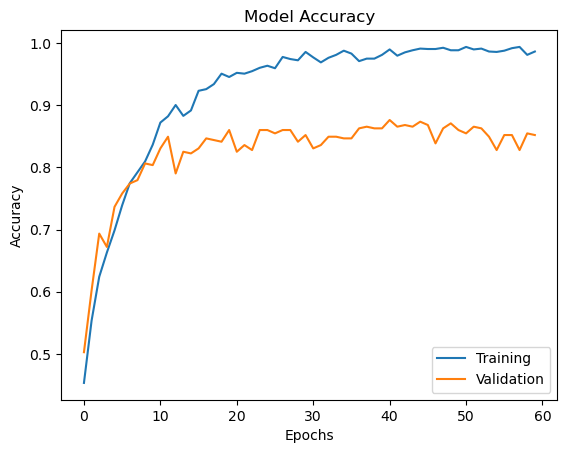

In [59]:
fig, ax = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
#fig.savefig('Model Accuracy.png', format='png', dpi=300)

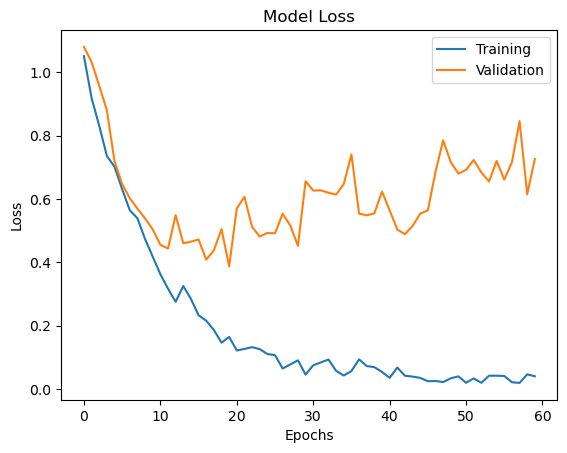

In [60]:
fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
#fig.savefig('Model Loss.png', format='png', dpi=300)

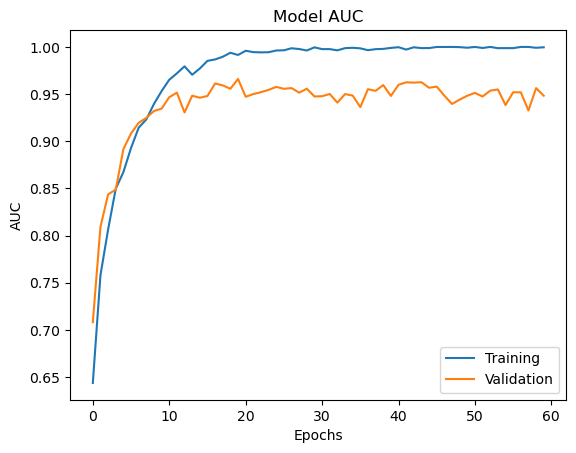

In [61]:
fig, ax = plt.subplots()
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
#fig.savefig('Model AUC.png', format='png', dpi=300)